In [1]:
import numpy as np
import pandas as pd

health = pd.read_csv("../Datasets/rankmd.csv", delimiter=";")
FastFood = pd.read_csv("../Datasets/FastFoodRestaurants.csv")
income = pd.read_csv("../Datasets/kaggle_income.csv", encoding="ISO 8859-1")

us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}
    
# invert the dictionary
abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

FastFood['State'] = FastFood['province'].map(abbrev_to_us_state)
States = health.copy()
States = States[States['FIPS'].astype(str).str.endswith('000')]

 # Overall look at key features of the datasets across States

In [2]:
print("Top 5 states with the most Premature Deaths:")
States.sort_values("premature_deathDeaths",ascending=False).head()

Top 5 states with the most Premature Deaths:


,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
190,6000,California,NaN,NaN,350612.0,5253.0,5228.0,5278.0,NaN,9636.0,...,74.0,75.0,75.0,75.0,18191555,42,42,42,NaN,NaN
2566,48000,Texas,NaN,NaN,302432.0,6620.0,6587.0,6653.0,NaN,3497.0,...,79.0,82.0,82.0,82.0,13115511,39,39,39,NaN,NaN
329,12000,Florida,NaN,NaN,266657.0,7188.0,7145.0,7231.0,NaN,5380.0,...,77.0,81.0,81.0,81.0,9383111,42,42,43,NaN,NaN
1860,36000,New York,NaN,NaN,191195.0,5406.0,5370.0,5443.0,NaN,4789.0,...,35.0,63.0,63.0,63.0,9300315,39,38,39,NaN,NaN
2078,39000,Ohio,NaN,NaN,169097.0,8545.0,8484.0,8607.0,NaN,4405.0,...,76.0,85.0,85.0,85.0,5488776,31,31,31,NaN,NaN


[Text(0.5, 1.0, 'Percentage of Obese people per state'),
 Text(0.5, 0, 'Percentage of adult people with obesity')]

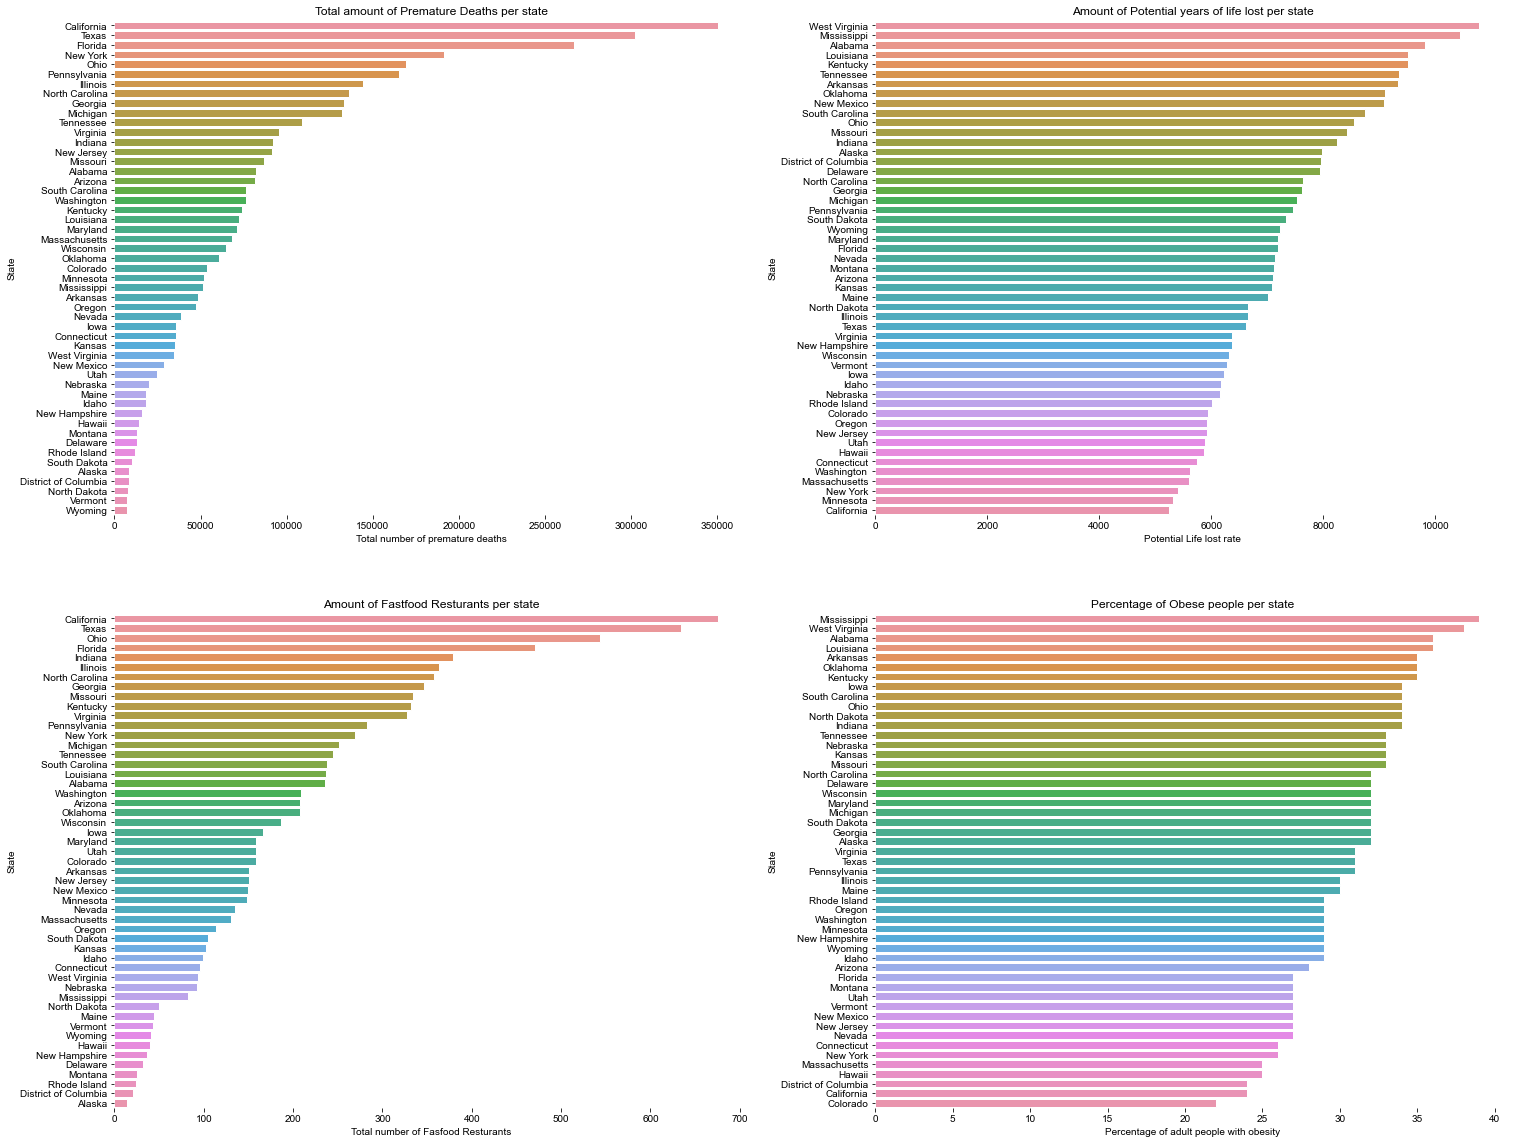

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, sharex=False, figsize=(25,20))
sns.set(rc={'figure.figsize':(12,9)})
sns.despine(left=True, bottom=True)
sns.barplot(ax=axes[0,0], data=States.sort_values("premature_deathDeaths",ascending=False), y='State', x='premature_deathDeaths').set(title='Total amount of Premature Deaths per state',  xlabel='Total number of premature deaths')
sns.barplot(ax=axes[0,1], data=States.sort_values("premature_deathYears_of_Potential_Life_Lost_Rate",ascending=False), y='State', x='premature_deathYears_of_Potential_Life_Lost_Rate').set(title='Amount of Potential years of life lost per state',  xlabel='Potential Life lost rate')
sns.barplot(ax=axes[1,0], data=FastFood.groupby(['State']).count().reset_index().sort_values("address",ascending=False), y='State', x='address').set(title='Amount of Fastfood Resturants per state', xlabel='Total number of Fasfood Resturants')
sns.barplot(ax=axes[1,1], data=States.sort_values('adult_obesity_% Adults with Obesity',ascending=False), y='State', x='adult_obesity_% Adults with Obesity').set(title='Percentage of Obese people per state', xlabel='Percentage of adult people with obesity')

/var/folders/p7/1qllz46s60lfswf2l4vv4qtr0000gn/T/ipykernel_45973/2741211261.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  FastFood["Chain"] = FastFood["name"].str.lower().str.replace(r"[\"\',]", '').str.replace(r"\-"," ")


[Text(0.5, 1.0, 'Number of Resturants per the 50 most popular chains'),
 Text(0.5, 0, 'Number of Resturants')]

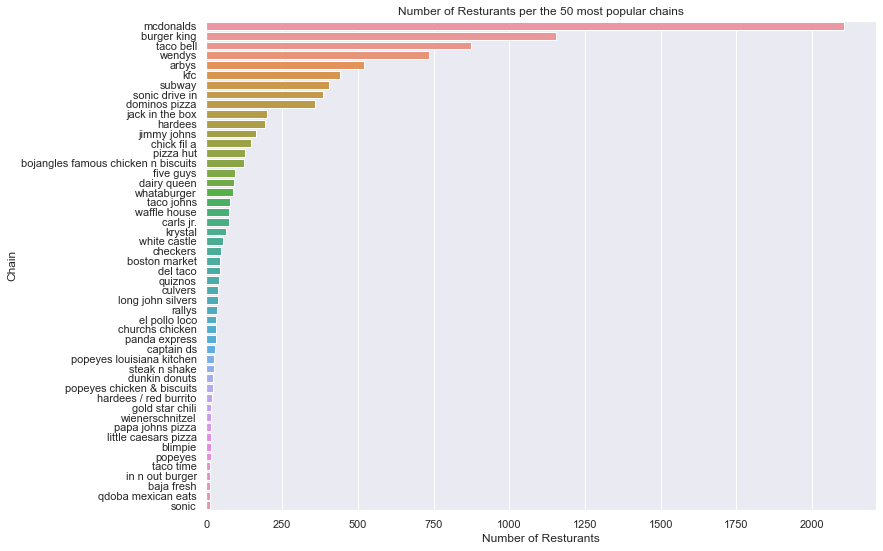

In [4]:
FastFood["Chain"] = FastFood["name"].str.lower().str.replace(r"[\"\',]", '').str.replace(r"\-"," ")
sns.barplot(data=FastFood.groupby(['Chain']).count().reset_index().sort_values('address',ascending=False)[0:50], y='Chain', x='address').set(title='Number of Resturants per the 50 most popular chains', xlabel='Number of Resturants')

In [5]:
fc = list(health.groupby(["State","County"]).sum().reset_index().sort_values("premature_deathYears_of_Potential_Life_Lost_Rate", ascending=False).head(10).County)

In [6]:
fcdf = health[health['County'].isin(fc)].sort_values("premature_deathYears_of_Potential_Life_Lost_Rate", ascending=False).head(10).reset_index()

In [7]:
fcdf

,index,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,...,drive_alone_to_work_% Drive Alone (Hispanic) 95% CI - High,drive_alone_to_work_% Drive Alone (White),drive_alone_to_work_% Drive Alone (White) 95% CI - Low,drive_alone_to_work_% Drive Alone (White) 95% CI - High,long_commute_driving_alone_# Workers who Drive Alone,long_commute_driving_alone_% Long Commute - Drives Alone,long_commute_driving_alone_95% CI - Low,long_commute_driving_alone_95% CI - High,long_commute_driving_alone_Quartile,Unnamed: 249
0,2454,46102,South Dakota,Oglala Lakota,NaN,348.0,25033.0,21974.0,28093.0,4.0,...,NaN,57.0,42.0,71.0,3367,21,14,28,3.0,NaN
1,2418,46031,South Dakota,Corson,NaN,106.0,23806.0,18144.0,29468.0,4.0,...,NaN,47.0,38.0,56.0,1280,38,32,44,4.0,NaN
2,2411,46017,South Dakota,Buffalo,NaN,46.0,23226.0,16085.0,32457.0,4.0,...,NaN,NaN,NaN,NaN,594,19,8,30,2.0,NaN
3,2423,46041,South Dakota,Dewey,NaN,121.0,21579.0,16970.0,26188.0,4.0,...,NaN,62.0,56.0,68.0,2042,18,14,22,2.0,NaN
4,1626,30003,Montana,Big Horn,NaN,293.0,21306.0,18229.0,24383.0,4.0,...,NaN,67.0,58.0,76.0,4747,25,21,30,3.0,NaN
5,1667,30085,Montana,Roosevelt,NaN,251.0,20973.0,17735.0,24212.0,4.0,...,NaN,79.0,75.0,83.0,3808,23,19,28,3.0,NaN
6,2450,46095,South Dakota,Mellette,NaN,56.0,20805.0,13711.0,30270.0,4.0,...,NaN,NaN,NaN,NaN,539,44,28,60,4.0,NaN
7,2968,51580,Virginia,Covington City,NaN,156.0,20647.0,13831.0,27463.0,4.0,...,NaN,NaN,NaN,NaN,2518,20,11,28,1.0,NaN
8,83,2158,Alaska,Kusilvak,NaN,137.0,20542.0,16690.0,24395.0,4.0,...,NaN,NaN,NaN,NaN,2140,0,0,36,1.0,NaN
9,2067,38085,North Dakota,Sioux,NaN,95.0,19926.0,15379.0,25397.0,4.0,...,NaN,66.0,47.0,86.0,1231,24,18,30,3.0,NaN


In [8]:
int(float((fcdf["unemployed_% Unemployed"].str.replace(",",".")[0])))

9

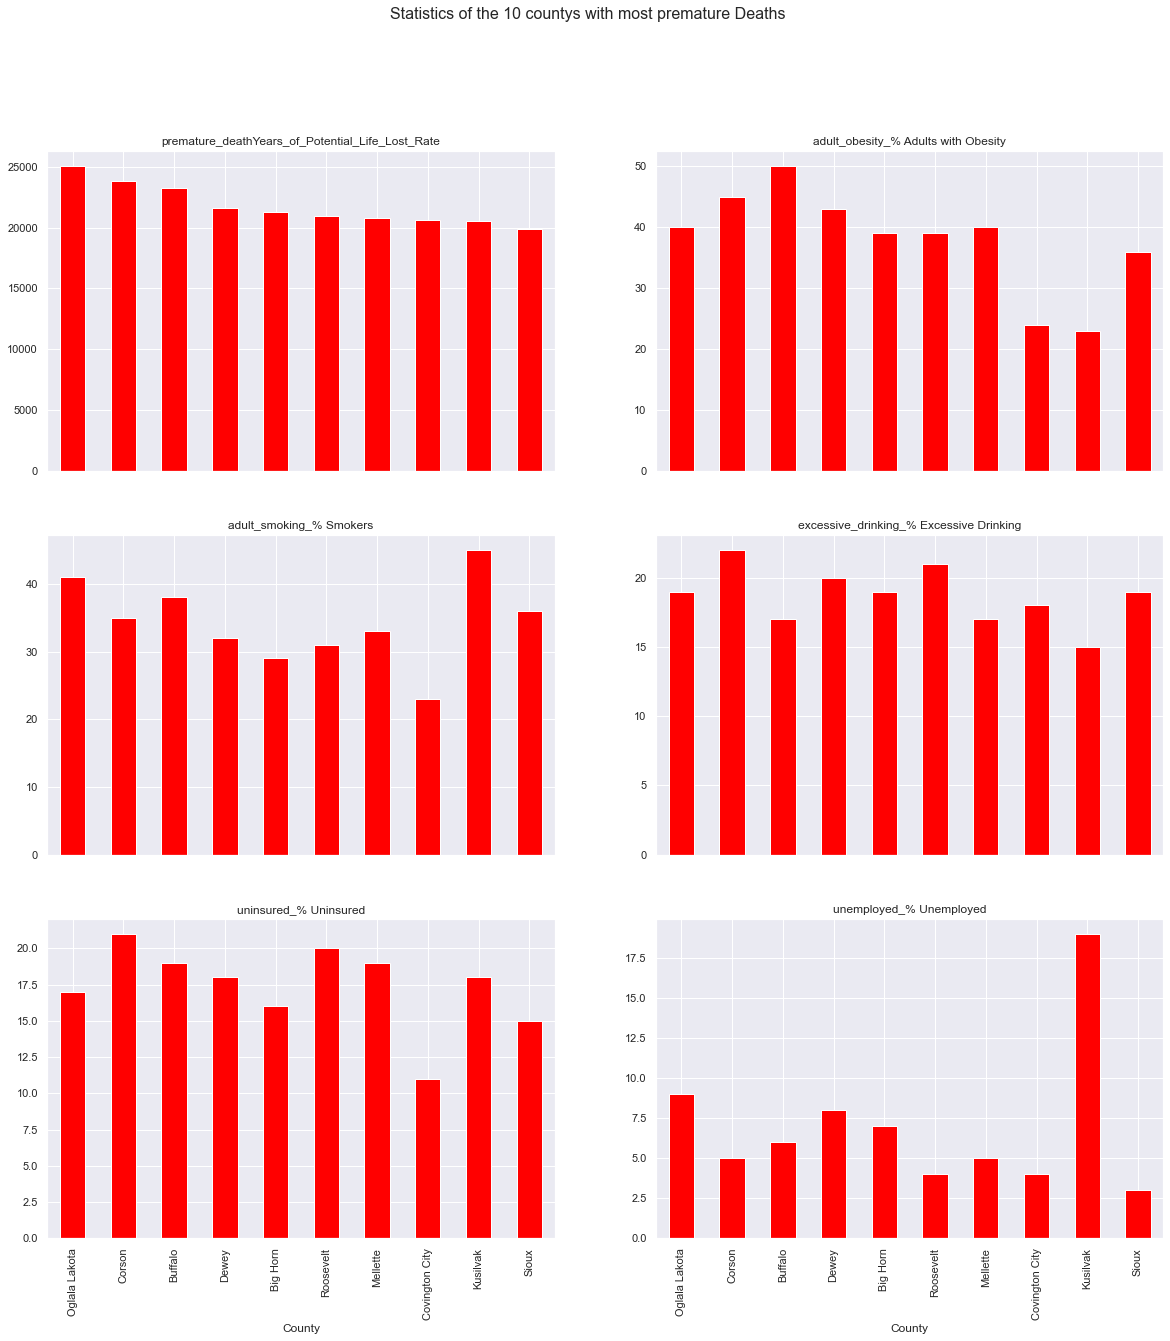

In [9]:
import matplotlib.pyplot as plt
#fcdf = fcdf.reset_index()

nrow = 3
ncol = 2


fig, axes = plt.subplots(nrows=nrow,
                         ncols=ncol,
                         sharex=True,
                         figsize=(20, 20))
fig.suptitle('Statistics of the 10 countys with most premature Deaths', fontsize=16)

focus_columns = ["premature_deathYears_of_Potential_Life_Lost_Rate",'adult_obesity_% Adults with Obesity',
                 "adult_smoking_% Smokers", "excessive_drinking_% Excessive Drinking",
                 "uninsured_% Uninsured", "unemployed_% Unemployed"]

fcdf["unemployed_% Unemployed"] = fcdf["unemployed_% Unemployed"].str.replace(",",".").astype(float).astype(int)

count=0
for r in range(nrow):
    for c in range(ncol):
        fcdf.plot.bar(x='County', y=focus_columns[count], rot=90, title=focus_columns[count],ax=axes[r,c], legend=False, color="red")
        count+=1

In [10]:
income["County"] = income.County.str.rsplit(' ',1).str[0]
temp_df = income.groupby(["State_Name","County"]).mean().reset_index()

In [11]:
temp_df

,State_Name,County,id,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,Alabama,Autauga,8.220127e+05,1.0,35879.092873,1.185244e+08,3.958554e+06,32.985114,-86.766829,53735.557235,64082.386609,41703.816415,504.395687
1,Alabama,Barbour,1.011010e+06,1.0,36048.000000,2.607032e+07,2.325400e+04,31.708516,-85.611039,37725.000000,19528.000000,43789.000000,258.017685
2,Alabama,Blount,1.011400e+06,1.0,35049.000000,9.758714e+06,1.477500e+04,33.992756,-86.500325,55127.000000,44609.000000,39231.000000,87.196661
3,Alabama,Butler,1.011120e+06,1.0,36033.000000,1.615454e+07,0.000000e+00,31.639134,-86.746762,27993.000000,19757.000000,27656.000000,553.438214
4,Alabama,Chambers,7.083003e+05,1.0,36660.000000,1.441824e+07,2.764433e+04,32.883553,-85.422471,45107.000000,37033.000000,36150.000000,837.616290
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,Wyoming,Platte,5.601271e+06,56.0,82201.000000,4.909335e+06,0.000000e+00,42.053464,-104.907886,127999.000000,300000.000000,18725.000000,17.797152
1674,Wyoming,Sheridan,5.601281e+06,56.0,82836.000000,1.384695e+06,0.000000e+00,44.873296,-107.262489,68733.000000,64759.000000,40427.000000,196.322103
1675,Wyoming,Sweetwater,5.601381e+06,56.0,82637.000000,1.211634e+07,0.000000e+00,41.326713,-109.171173,0.000000,0.000000,0.000000,0.000000
1676,Wyoming,Uinta,5.601251e+06,56.0,82931.000000,4.980649e+06,0.000000e+00,41.385854,-111.026996,89130.000000,83387.000000,47742.000000,93.726272


In [18]:
health
new_df = pd.merge(health.copy(), temp_df.copy(),  how='left', left_on=['State','County'], right_on = ['State_Name','County'])

In [19]:
new_df

,FIPS,State,County,Unreliable,premature_deathDeaths,premature_deathYears_of_Potential_Life_Lost_Rate,premature_death_95% CILow,premature_death_95% CI - High,premature_death_Quartile,premature_death_YPLL Rate (AIAN),...,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1000,Alabama,NaN,NaN,82249.0,9820.0,9718.0,9922.0,NaN,5145.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1001,Alabama,Autauga,NaN,787.0,7830.0,6998.0,8662.0,1.0,NaN,...,1.0,35879.092873,1.185244e+08,3.958554e+06,32.985114,-86.766829,53735.557235,64082.386609,41703.816415,504.395687
2,1003,Alabama,Baldwin,NaN,3147.0,7680.0,7237.0,8124.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1005,Alabama,Barbour,NaN,515.0,11477.0,9908.0,13045.0,3.0,NaN,...,1.0,36048.000000,2.607032e+07,2.325400e+04,31.708516,-85.611039,37725.000000,19528.000000,43789.000000,258.017685
4,1007,Alabama,Bibb,NaN,476.0,12173.0,10506.0,13839.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56037,Wyoming,Sweetwater,NaN,527.0,7775.0,6849.0,8701.0,3.0,NaN,...,56.0,82637.000000,1.211634e+07,0.000000e+00,41.326713,-109.171173,0.000000,0.000000,0.000000,0.000000
3189,56039,Wyoming,Teton,NaN,109.0,2980.0,2094.0,3866.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3190,56041,Wyoming,Uinta,NaN,271.0,8081.0,6637.0,9525.0,4.0,NaN,...,56.0,82931.000000,4.980649e+06,0.000000e+00,41.385854,-111.026996,89130.000000,83387.000000,47742.000000,93.726272
3191,56043,Wyoming,Washakie,NaN,104.0,6541.0,4417.0,8665.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#!{sys.executable} -m pip install pgeocode
import pgeocode

nomi = pgeocode.Nominatim('us')
county_names = []
for i in range(len(FastFood)):
    county_names.append(nomi.query_postal_code(FastFood["postalCode"][i]).county_name)
    
FastFood["County"] = county_names

In [ ]:
temptemp = FastFood.groupby(["State", "County"]).count().reset_index()[['State','County','address']]

In [ ]:
tempo = temptemp.rename(columns={'address':'nr of FFchains'})

In [ ]:
new_df = pd.merge(new_df, tempo,  how='left', left_on=['State','County'], right_on =['State','County'])

In [ ]:
new_df['nr of FFchains'] = new_df['nr of FFchains'].fillna(0)

In [ ]:
data = new_df[["premature_deathYears_of_Potential_Life_Lost_Rate",'adult_obesity_% Adults with Obesity',
                 "adult_smoking_% Smokers", "excessive_drinking_% Excessive Drinking",
                 "uninsured_% Uninsured", "unemployed_% Unemployed", 'nr of FFchains', 'Mean']]
data = data.dropna()
data['is_obese'] = data['adult_obesity_% Adults with Obesity']>=33
data = data.drop(['adult_obesity_% Adults with Obesity'],axis=1)
data["unemployed_% Unemployed"] = data["unemployed_% Unemployed"].str.replace(",",".").astype(float).astype(int)

In [ ]:
data

In [24]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


clf = DecisionTreeClassifier(random_state=0)

y = data['is_obese']
X = data.drop(['is_obese'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42069)

clf = clf.fit(X_train, y_train)
    
y_pred = clf.predict(X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
#return tn, fp, fn, tp
confusion_matrix(y_test, y_pred)

array([[5031,   82],
       [  78, 5277]])

In [26]:
accuracy = (tp+tn)/(tp+tn+fp+fn)
precision = tp/(tp+fp)
recall = tp/(tp+fn)
F1 = 2*precision*recall/(precision + recall)

print("Accuracy of the model:", accuracy)
print("Precision of the model:", precision)
print("recall of the model:", recall)
print("F1-score of the model:", F1)

Accuracy of the model: 0.9847153228888039
Precision of the model: 0.9846986378055608
recall of the model: 0.9854341736694678
F1-score of the model: 0.9850662684338249


<AxesSubplot:xlabel='Importance', ylabel='Features'>

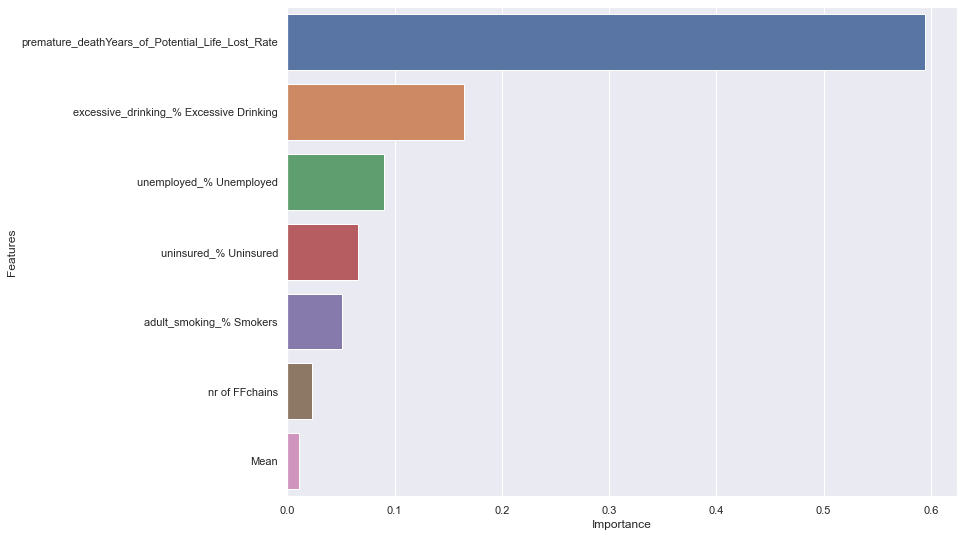

In [27]:
import seaborn as sns
importances = pd.DataFrame({'Features':X.columns,
                            'Importance':clf.feature_importances_})

sns.despine(left=True, bottom=True)
sns.barplot(data=importances.sort_values("Importance",ascending=False), y='Features', x='Importance')